<center><b> AIML Feature Engineering Assignment 1 </b></center><br/>
<center><b> Student Id: 2021AIML064 </b></center><br/>
The data files Bollywood.csv and Bollywood - 2 .csv contains the box office collection and social media promotion information about the movies released in 2013 – 2015 period. 
Following is the information about the columns (names can vary):
•	Serial Id of movie                      
•	Release date of movie                       
•	Release time of movie like Long Weekend (3), Festive Season (1), Holiday Season (2), and Normal (4)                  
•	Genre of movie like Romance, Thriller, Action, comedy etc.            
•	Budget of movie in crores                       
•	Box office collection of movie in crore                 
•	YouTube views of movies trailers               
•	YouTube likes for the movie trailers                     
•	YouTube dislikes for the movie trailers

Q1. Identify and rectify the eight prominent data quality issues present in the given datasets.                                                                                                                                    [8]   
Q2. How many records are present in the combined dataset? Print the metadata information of dataset. 											 [1]                     
Q3. How many movies in each genre got released in different release times?  [1]               

Q4. Which month of the year, maximum movie releases are seen?                                  [1]                  
Q5. Which movies have got more dislikes than likes on Youtube? What are the number of views on these movies?                   			[1]
Q6. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?      			       [1]               

Q7. What is the correlation between Box office collection & Budget? How would you interpret it?                                                                      					       [1]             
Q8. Which are the top 10 movies with maximum return of investment (ROI)? Calculate ROI as (Box office collection – Budget) / Budget.                                                                      [1]


In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
import seaborn as sns

**Read data from the 2 csv files**

In [2]:
# Read data from csv file
df1 = pd.read_csv('bollywood.csv')
# print (df1.head())
print("Row and column counts in bollywood.csv: ",df1.shape)

Row and column counts in bollywood.csv:  (51, 11)


In [3]:
# Read data from csv file
df2 = pd.read_csv('bollywood - 2.csv')
# df2.head()
print("Row and column counts in bollywood - 2.csv: ",df2.shape)

Row and column counts in bollywood - 2.csv:  (99, 10)


# **Q1. Identify and rectify the eight prominent data quality issues present in the given datasets.**

In [4]:
# bollywood dataset has 11 columns whereas bollywood - 2 has 10 columns. Find the missing column from bollywood - 2.csv
print (df1.columns)
print (df2.columns)

Index(['No', 'RelDate', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes', 'YoutubeLikeDislikes'],
      dtype='object')
Index(['Movie_ID', 'Release_Date', 'Movie_Name', 'Release_Time', 'Genre',
       'BudgetCr', 'BoxOfficeCollectionCr', 'Youtube_Views', 'Youtube_Likes',
       'Youtube_Dislikes'],
      dtype='object')


**Analysing the columns from the 2 datasets, column 'YoutubeLikeDislikes' which is a derived column and seems sum of YoutubeLikes and YoutubeDislikes is missing from bollywood - 2.csv.**

**Let's get this column added in dataframe df2 (bollywood - 2). This column has sum of values from Youtube_Likes and Youtube_Dislikes.**

In [5]:
# check if the datatypes of columns Youtube_Likes and Youtube_Dislikes are really number values,
# then only they could br summed
df2.dtypes 

Movie_ID                   int64
Release_Date              object
Movie_Name                object
Release_Time              object
Genre                     object
BudgetCr                   int64
BoxOfficeCollectionCr    float64
Youtube_Views              int64
Youtube_Likes              int64
Youtube_Dislikes           int64
dtype: object

Columns Youtube_Likes and Youtube_Dislikes in dataframe df2 (bollywood - 2) are really numeral values,
hence could be summed.

In [6]:
# create a derived column to store sum of Youtube_Likes and Youtube_Dislikes
df2['Youtube_Like_Dislikes'] = df2.apply(lambda row: row['Youtube_Likes'] + row['Youtube_Dislikes'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Movie_ID               99 non-null     int64  
 1   Release_Date           99 non-null     object 
 2   Movie_Name             99 non-null     object 
 3   Release_Time           99 non-null     object 
 4   Genre                  99 non-null     object 
 5   BudgetCr               99 non-null     int64  
 6   BoxOfficeCollectionCr  99 non-null     float64
 7   Youtube_Views          99 non-null     int64  
 8   Youtube_Likes          99 non-null     int64  
 9   Youtube_Dislikes       99 non-null     int64  
 10  Youtube_Like_Dislikes  99 non-null     int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 8.6+ KB


**Analysis of bollywood and bollywood - 2 datasets show bollywood - 2 as having more meaningful headers as it contains more information about data (EX. - Amount in Cr., Movie_ID instead of No and meaningful names for the headers.).**
**Hence rename the headers of df1 (bollywood) as of df2 (bollywood - 2).**

In [7]:
for df1_col, df2_col in zip(df1.columns, df2.columns):
    df1.rename(columns = {df1_col : df2_col}, inplace = True)
df1.columns 

Index(['Movie_ID', 'Release_Date', 'Movie_Name', 'Release_Time', 'Genre',
       'BudgetCr', 'BoxOfficeCollectionCr', 'Youtube_Views', 'Youtube_Likes',
       'Youtube_Dislikes', 'Youtube_Like_Dislikes'],
      dtype='object')

Now the column headers of df1 and df2 are same. **Combine df2 (bollywood - 2) with df1 (bollywood).**

In [8]:
df_combined = df1.append(df2)
df_combined.shape

(150, 11)

In [9]:
print (df_combined.head())
print (df_combined.tail())

   Movie_ID Release_Date          Movie_Name Release_Time         Genre  \
0         1  Apr-18-2014            2 States            3  RomanceGenre   
1         2   Jan-4-2013        Table No. 21            4     Thriller    
2         3  Jul-18-2014  Amit Sahni Ki List            4   ComedyGenre   
3         4   Jan-4-2013    Rajdhani Express            4    DramaGenre   
4         5   Jul-4-2014        Bobby Jasoos           44   ComedyGenre   

  BudgetCr BoxOfficeCollectionCr  Youtube_Views  Youtube_Likes  \
0     36Cr                   104        8576361        26622.0   
1     Cr10                    12        1087320         1129.0   
2     10Cr                     4         572336          586.0   
3      7Cr                   383          42626           86.0   
4     18Cr                  10.8        3113427         4512.0   

   Youtube_Dislikes  Youtube_Like_Dislikes  
0            2527.0                  29149  
1             137.0                   1266  
2              54

In [10]:
# find if any of the colums have nulls and also the data types
print (df_combined.info())
# print (df_combined.isnull().mean())
df_combined[df_combined.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 98
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Movie_ID               150 non-null    int64  
 1   Release_Date           150 non-null    object 
 2   Movie_Name             150 non-null    object 
 3   Release_Time           150 non-null    object 
 4   Genre                  150 non-null    object 
 5   BudgetCr               150 non-null    object 
 6   BoxOfficeCollectionCr  150 non-null    object 
 7   Youtube_Views          150 non-null    int64  
 8   Youtube_Likes          149 non-null    float64
 9   Youtube_Dislikes       147 non-null    float64
 10  Youtube_Like_Dislikes  150 non-null    int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 14.1+ KB
None


,Movie_ID,Release_Date,Movie_Name,Release_Time,Genre,BudgetCr,BoxOfficeCollectionCr,Youtube_Views,Youtube_Likes,Youtube_Dislikes,Youtube_Like_Dislikes
9,10,Jan-11-2013,Gangoobai,4,DramaGenre,2Cr,Cr0.01,4354,1.0,NaN,2
31,32,Feb-15-2013,Murder 3,1,Thriller,12Cr,25,2249055,1879.0,NaN,2626
39,40,Jun-20-2014,Humshakals,2,ComedyGenre,75Cr,63.7,6280868,NaN,1.0,2
46,47,Mar-15-2013,Mere Dad Ki Maruti,4,ComedyGenre,5Cr,11,569711,1226.0,NaN,1359


**The above information about the dataset shows further following issues**
1. 1 missing value in column Youtube_Likes 
2. 3 missing values in column Youtube_Dislikes
3. BudgetCr is expected to be a float but it seems to be object
4. BoxOfficeCollectionCr is expected to be a float but it seems to be object

**We can get this missing values of the Youtube_Likes and Youtube_Dislikes as fortunately we have the sum of these values in column Youtube_Like_Dislikes**

In [11]:
# Replace the nulls in Youtube_Likes and Youtube_Dislikes
df_combined['Youtube_Likes'] = df_combined['Youtube_Likes'].fillna(df_combined['Youtube_Like_Dislikes'] - df_combined['Youtube_Dislikes'])
df_combined['Youtube_Dislikes'] = df_combined['Youtube_Dislikes'].fillna(df_combined['Youtube_Like_Dislikes'] - df_combined['Youtube_Likes'])
# Check if the nulls are replaced with means
print (df_combined.info())
df_combined.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 98
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Movie_ID               150 non-null    int64  
 1   Release_Date           150 non-null    object 
 2   Movie_Name             150 non-null    object 
 3   Release_Time           150 non-null    object 
 4   Genre                  150 non-null    object 
 5   BudgetCr               150 non-null    object 
 6   BoxOfficeCollectionCr  150 non-null    object 
 7   Youtube_Views          150 non-null    int64  
 8   Youtube_Likes          150 non-null    float64
 9   Youtube_Dislikes       150 non-null    float64
 10  Youtube_Like_Dislikes  150 non-null    int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 14.1+ KB
None


,Movie_ID,Youtube_Views,Youtube_Likes,Youtube_Dislikes,Youtube_Like_Dislikes
count,150.000000,1.500000e+02,150.000000,150.000000,150.000000
mean,74.840000,3.342323e+06,7840.400000,1203.080000,9043.480000
std,43.056242,3.493044e+06,12713.335141,1847.377283,14332.917715
min,1.000000,4.354000e+03,1.000000,1.000000,2.000000
25%,38.250000,1.076874e+06,1379.000000,194.750000,1648.000000
50%,74.500000,2.386348e+06,4082.500000,613.500000,4858.500000
75%,111.750000,4.542225e+06,9080.250000,1412.250000,10472.000000
max,149.000000,2.317107e+07,101275.000000,11888.000000,111341.000000


#### The data types of BudgetCr and BoxOfficeCollectionCr contains CR appended or added to the numeric value. Hence Cr needs to be trimmed from these columns.      

In [12]:
# print( 'Is BudgetCr column a numeric value : ', is_numeric_dtype(df_combined['BudgetCr'])) 
# print( 'Is BoxOfficeCollectionCr column a numeric value : ', is_numeric_dtype(df_combined['BoxOfficeCollectionCr'])) 
df_combined['BudgetCr'].replace('Cr', '', regex = True, inplace =True)
df_combined['BoxOfficeCollectionCr'].replace('Cr', '', regex = True, inplace =True)

In [13]:
df_combined['BudgetCr'] = df_combined['BudgetCr'].astype(float)
df_combined['BoxOfficeCollectionCr'] = df_combined['BoxOfficeCollectionCr'].astype(float)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 98
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Movie_ID               150 non-null    int64  
 1   Release_Date           150 non-null    object 
 2   Movie_Name             150 non-null    object 
 3   Release_Time           150 non-null    object 
 4   Genre                  150 non-null    object 
 5   BudgetCr               150 non-null    float64
 6   BoxOfficeCollectionCr  150 non-null    float64
 7   Youtube_Views          150 non-null    int64  
 8   Youtube_Likes          150 non-null    float64
 9   Youtube_Dislikes       150 non-null    float64
 10  Youtube_Like_Dislikes  150 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 14.1+ KB


**Check if there are any duplicate data**


In [14]:
# Check duplicate records in Entire dataset
print ('Duplicate rows in data set: ', df_combined.duplicated().sum())

# find the duplicates with duplicate movie IDs
df_combined[df_combined.duplicated(['Movie_ID'], keep = False)]

Duplicate rows in data set:  0


,Movie_ID,Release_Date,Movie_Name,Release_Time,Genre,BudgetCr,BoxOfficeCollectionCr,Youtube_Views,Youtube_Likes,Youtube_Dislikes,Youtube_Like_Dislikes
50,51,Jul-7-2014,Lekar Hum Deewana Dil,4,RomanceGenre,16.0,2.5,3998331,2307.0,497.0,2804
0,51,4-Jul-14,Lekar Hum Deewana Dil,N,Romance,16.0,2.5,3998331,2307.0,497.0,2804


In [15]:
# googling showed that release date for 'Lekar Hum Deewana Dil' is hence keep 4 July 2014
df_combined.drop_duplicates(subset = 'Movie_ID', keep = 'last', inplace = True)

In [16]:
df_combined.info()                                     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 98
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Movie_ID               149 non-null    int64  
 1   Release_Date           149 non-null    object 
 2   Movie_Name             149 non-null    object 
 3   Release_Time           149 non-null    object 
 4   Genre                  149 non-null    object 
 5   BudgetCr               149 non-null    float64
 6   BoxOfficeCollectionCr  149 non-null    float64
 7   Youtube_Views          149 non-null    int64  
 8   Youtube_Likes          149 non-null    float64
 9   Youtube_Dislikes       149 non-null    float64
 10  Youtube_Like_Dislikes  149 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 14.0+ KB


**Duplicate row with invalid release date is dropped and now the total rows are 149.<br/>
Let's see if any invalid release dates**

In [17]:
df_combined['Release_Date_Temp'] = pd.to_datetime(df_combined['Release_Date'], format = '%b-%d-%Y', errors = 'coerce')

In [18]:
df_combined[df_combined['Release_Date_Temp'].isnull()]

,Movie_ID,Release_Date,Movie_Name,Release_Time,Genre,BudgetCr,BoxOfficeCollectionCr,Youtube_Views,Youtube_Likes,Youtube_Dislikes,Youtube_Like_Dislikes,Release_Date_Temp
6,7,Sqp-19-2014,Daawat-E-Ishq,4,ComedyGenre,30.0,24.60,3905050,8315.0,1373.0,9688,NaT
12,13,Jum-27-2014,Ek Villain,2,RomanceGenre,35.0,105.50,4518748,13558.0,1094.0,14652,NaT
17,18,juu-6-2014,Filmistaan,2,ComedyGenre,10.0,6.00,989096,1608.0,173.0,1781,NaT
34,35,Feb-21-204,Highway,4,Drama,30.0,27.25,3043012,9100.0,971.0,10071,NaT
0,51,4-Jul-14,Lekar Hum Deewana Dil,N,Romance,16.0,2.50,3998331,2307.0,497.0,2804,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
94,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15.0,30.00,3250917,8185.0,615.0,8800,NaT
95,146,13-Mar-15,NH10,N,Thriller,13.0,32.10,5592977,15464.0,1513.0,16977,NaT
96,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32.0,12.00,2316047,4289.0,807.0,5096,NaT
97,148,20-Mar-15,Hunterrr,N,Comedy,5.0,11.89,4674795,3706.0,762.0,4468,NaT


In [19]:
df_combined.head(10)

,Movie_ID,Release_Date,Movie_Name,Release_Time,Genre,BudgetCr,BoxOfficeCollectionCr,Youtube_Views,Youtube_Likes,Youtube_Dislikes,Youtube_Like_Dislikes,Release_Date_Temp
0,1,Apr-18-2014,2 States,3,RomanceGenre,36.0,104.00,8576361,26622.0,2527.0,29149,2014-04-18
1,2,Jan-4-2013,Table No. 21,4,Thriller,10.0,12.00,1087320,1129.0,137.0,1266,2013-01-04
2,3,Jul-18-2014,Amit Sahni Ki List,4,ComedyGenre,10.0,4.00,572336,586.0,54.0,640,2014-07-18
3,4,Jan-4-2013,Rajdhani Express,4,DramaGenre,7.0,383.00,42626,86.0,19.0,105,2013-01-04
4,5,Jul-4-2014,Bobby Jasoos,44,ComedyGenre,18.0,10.80,3113427,4512.0,1224.0,5736,2014-07-04
5,6,May-30-2014,Citylights,2,DramaGenre,7.0,35.00,1076591,1806.0,84.0,1890,2014-05-30
6,7,Sqp-19-2014,Daawat-E-Ishq,4,ComedyGenre,30.0,24.60,3905050,8315.0,1373.0,9688,NaT
7,8,Jan-11-2013,Matru Ki Bijlee Ka Mandola,4,ComedyGenre,33.0,40.00,2435283,4326.0,647.0,4973,2013-01-11
8,9,Jan-10-2014,Dedh Ishqiya,3,ComedyGenre,31.0,27.00,2333067,2436.0,591.0,3027,2014-01-10
9,10,Jan-11-2013,Gangoobai,4,DramaGenre,2.0,0.01,4354,1.0,1.0,2,2013-01-11


**Following dates seem invalid** <br/>
7 	Sqp-19-2014 	Daawat-E-Ishq<br/>
13 	Jum-27-2014 	Ek Villain 	<br/>
18 	juu-6-2014 	Filmistaan<br/>
35 	Feb-21-204 	Highway<br/> 
**Change the dates to the closest resembling months and the year range**<br/>
The closest release dates are<br/>

7 	19-Sep-2014 	Daawat-E-Ishq<br/>
13 	27-Jun-2014 	Ek Villain 	<br/>
18 	6-Jun-2014 	Filmistaan<br/>
35 	21-Feb-2014 	Highway<br/> 

In [20]:
# Find the indicies and replace the invalid dates
df_combined.loc[6, 'Release_Date'] = '19-Sep-2014'
df_combined.loc[12, 'Release_Date'] = '27-Jun-2014'
df_combined.loc[17, 'Release_Date'] = '6-Jun-2014'
df_combined.loc[34, 'Release_Date'] = '21-Feb-2014'
df_combined.head(35)

,Movie_ID,Release_Date,Movie_Name,Release_Time,Genre,BudgetCr,BoxOfficeCollectionCr,Youtube_Views,Youtube_Likes,Youtube_Dislikes,Youtube_Like_Dislikes,Release_Date_Temp
0,1,Apr-18-2014,2 States,3,RomanceGenre,36.0,104.00,8576361,26622.0,2527.0,29149,2014-04-18
1,2,Jan-4-2013,Table No. 21,4,Thriller,10.0,12.00,1087320,1129.0,137.0,1266,2013-01-04
2,3,Jul-18-2014,Amit Sahni Ki List,4,ComedyGenre,10.0,4.00,572336,586.0,54.0,640,2014-07-18
3,4,Jan-4-2013,Rajdhani Express,4,DramaGenre,7.0,383.00,42626,86.0,19.0,105,2013-01-04
4,5,Jul-4-2014,Bobby Jasoos,44,ComedyGenre,18.0,10.80,3113427,4512.0,1224.0,5736,2014-07-04
5,6,May-30-2014,Citylights,2,DramaGenre,7.0,35.00,1076591,1806.0,84.0,1890,2014-05-30
6,7,19-Sep-2014,Daawat-E-Ishq,4,ComedyGenre,30.0,24.60,3905050,8315.0,1373.0,9688,NaT
7,8,Jan-11-2013,Matru Ki Bijlee Ka Mandola,4,ComedyGenre,33.0,40.00,2435283,4326.0,647.0,4973,2013-01-11
8,9,Jan-10-2014,Dedh Ishqiya,3,ComedyGenre,31.0,27.00,2333067,2436.0,591.0,3027,2014-01-10
9,10,Jan-11-2013,Gangoobai,4,DramaGenre,2.0,0.01,4354,1.0,1.0,2,2013-01-11


In [21]:
# drop Release_Date_Temp which was needed to get the invalid date values 
if 'Release_Date_Temp' in df_combined:
    df_combined.drop(['Release_Date_Temp'], axis = 1, inplace = True) 
    df_combined.head()

**Analyse Release_Time column**
Release time is categorical in nature. Find the categories

In [22]:
# chack different type of values 
df_combined['Release_Time'].value_counts()

N     66
4     32
FS    14
LW    11
2     10
HS     8
3      4
1      3
44     1
Name: Release_Time, dtype: int64

**Long Weekend (3), Festive Season (1), Holiday Season (2), and Normal (4).
Hence, change LW to 3, FS to 1, HS to 2 and N to 4. There is 44 as well which could be mapped to nearest valid value 4**

In [23]:
def Release_Time_to_number(x):
    if x == 'N':
        return 4
    elif x == 'LW':
        return 3
    elif x == 'HS':
        return 2
    elif x == 'FS':
        return 1
    elif x == 44:
        return 4
    else:
        return x

df_combined['Release_Time'] = df_combined['Release_Time'].apply(lambda x: Release_Time_to_number(x))     
df_combined.head(10)

,Movie_ID,Release_Date,Movie_Name,Release_Time,Genre,BudgetCr,BoxOfficeCollectionCr,Youtube_Views,Youtube_Likes,Youtube_Dislikes,Youtube_Like_Dislikes
0,1,Apr-18-2014,2 States,3,RomanceGenre,36.0,104.00,8576361,26622.0,2527.0,29149
1,2,Jan-4-2013,Table No. 21,4,Thriller,10.0,12.00,1087320,1129.0,137.0,1266
2,3,Jul-18-2014,Amit Sahni Ki List,4,ComedyGenre,10.0,4.00,572336,586.0,54.0,640
3,4,Jan-4-2013,Rajdhani Express,4,DramaGenre,7.0,383.00,42626,86.0,19.0,105
4,5,Jul-4-2014,Bobby Jasoos,4,ComedyGenre,18.0,10.80,3113427,4512.0,1224.0,5736
5,6,May-30-2014,Citylights,2,DramaGenre,7.0,35.00,1076591,1806.0,84.0,1890
6,7,19-Sep-2014,Daawat-E-Ishq,4,ComedyGenre,30.0,24.60,3905050,8315.0,1373.0,9688
7,8,Jan-11-2013,Matru Ki Bijlee Ka Mandola,4,ComedyGenre,33.0,40.00,2435283,4326.0,647.0,4973
8,9,Jan-10-2014,Dedh Ishqiya,3,ComedyGenre,31.0,27.00,2333067,2436.0,591.0,3027
9,10,Jan-11-2013,Gangoobai,4,DramaGenre,2.0,0.01,4354,1.0,1.0,2


**Analyse Genre field**
Genre seems to categorical variable. check the categories

In [24]:
 #Genre_categories = pd.Categorical(df_combined['Genre'])
#print (Genre_categories)
df_combined['Genre'].value_counts()

Thriller        26
 Drama          24
Comedy          24
Romance         17
Action          14
ComedyGenre     12
 DramaGenre     11
ActionGenre      9
RomanceGenre     8
Thriller         3
Action           1
Name: Genre, dtype: int64

**Genre field shows following categories**
1. Thriller        
2. Comedy
3. Drama
4. Romance
5. Action

**Following issues are apparent in the Genre field data**
1. spaces which needs trimming
2. Genre appended to some of the categories

In [25]:
def Genre_fix_issues(x):
    if 'Genre' in x:
        x = x.replace('Genre', '').strip()
    else: 
        x = x.strip()
    return x
    
df_combined['Genre'] = df_combined['Genre'].apply(lambda x: Genre_fix_issues(x))     
df_combined.head()

,Movie_ID,Release_Date,Movie_Name,Release_Time,Genre,BudgetCr,BoxOfficeCollectionCr,Youtube_Views,Youtube_Likes,Youtube_Dislikes,Youtube_Like_Dislikes
0,1,Apr-18-2014,2 States,3,Romance,36.0,104.0,8576361,26622.0,2527.0,29149
1,2,Jan-4-2013,Table No. 21,4,Thriller,10.0,12.0,1087320,1129.0,137.0,1266
2,3,Jul-18-2014,Amit Sahni Ki List,4,Comedy,10.0,4.0,572336,586.0,54.0,640
3,4,Jan-4-2013,Rajdhani Express,4,Drama,7.0,383.0,42626,86.0,19.0,105
4,5,Jul-4-2014,Bobby Jasoos,4,Comedy,18.0,10.8,3113427,4512.0,1224.0,5736


**Data quality issues are now addressed. Following were the top 8 data quality issues:**
1. One Null/Missing value in column Youtube_Likes and 3 Null/missing values in column Youtube_Dislikes
2. The data types of BudgetCr and BoxOfficeCollectionCr contains CR appended 
3. Duplicate row with invalid release date for movie 'Lekar Hum Deewana Di'
4. Invalid release dates for 4 movies. Has incorrect month or format for these 4 movies
5. Invalid Release_Time - 44 . Also inconsistent values for Release time.Standardised values using replace function.
6. Issues in Genre field- 'spaces ' and 'Genre appended to some of the categories'
7. Headers of the 2 dataset -(bollywood) as of df2 (bollywood - 2) have different names.
8. Missing header YoutubeLikeDislikes in  bollywood - 2 dataset
#### Detailed solutions of data issues are rectified in above code 

# **Q2. How many records are present in the dataset? Print the metadata information of dataset.**

In [26]:
print ('Number of records in dataset: ', df_combined.shape[0])

Number of records in dataset:  149


In [27]:
# Get metadata
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 98
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Movie_ID               149 non-null    int64  
 1   Release_Date           149 non-null    object 
 2   Movie_Name             149 non-null    object 
 3   Release_Time           149 non-null    int64  
 4   Genre                  149 non-null    object 
 5   BudgetCr               149 non-null    float64
 6   BoxOfficeCollectionCr  149 non-null    float64
 7   Youtube_Views          149 non-null    int64  
 8   Youtube_Likes          149 non-null    float64
 9   Youtube_Dislikes       149 non-null    float64
 10  Youtube_Like_Dislikes  149 non-null    int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 18.0+ KB


In [28]:
# Get further description of the data
df_combined.describe()

,Movie_ID,Release_Time,BudgetCr,BoxOfficeCollectionCr,Youtube_Views,Youtube_Likes,Youtube_Dislikes,Youtube_Like_Dislikes
count,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000
mean,75.000000,3.315436,29.442953,58.235369,3.337920e+06,7877.536913,1207.818792,9085.355705
std,43.156691,1.072300,28.237981,98.111494,3.504407e+06,12748.047191,1852.692938,14372.048371
min,1.000000,1.000000,2.000000,0.010000,4.354000e+03,1.000000,1.000000,2.000000
25%,38.000000,3.000000,11.000000,10.000000,1.076591e+06,1377.000000,189.000000,1637.000000
50%,75.000000,4.000000,21.000000,28.200000,2.375050e+06,4111.000000,614.000000,4913.000000
75%,112.000000,4.000000,35.000000,58.000000,4.550051e+06,9100.000000,1419.000000,10486.000000
max,149.000000,4.000000,150.000000,735.000000,2.317107e+07,101275.000000,11888.000000,111341.000000


# **Q3. How many movies in each genre got released in different release times?**                

In [29]:
df_combined.groupby(['Genre', 'Release_Time']).sum()

Movie_ID  BudgetCr  BoxOfficeCollectionCr  \
Genre    Release_Time                                              
Action   1                  357     278.0                 717.00   
         2                  235     208.0                 251.00   
         3                  272     187.0                 239.20   
         4                  918     694.0                 993.14   
Comedy   1                  369      93.0                 404.00   
         2                  225     102.0                  87.30   
         3                  352     200.0                 436.50   
         4                 1694     515.0                 732.34   
Drama    1                  322      95.0                 176.00   
         2                  366     125.0                 804.25   
         3                   27     125.0                 383.00   
         4                 1882     502.0                1322.16   
Romance  1                  373      74.0                  74.00   
         2                  114      66.0                 171.60   
         3                  298      95.0                 201.13   
         4                 1070     394.0                 874.30   
Thriller 1                  334     151.0                 151.10   
         2                  100      16.0                  29.00   
         3                  132      89.0                 215.00   
         4                 1735     378.0                 415.05   

                       Youtube_Views  Youtube_Likes  Youtube_Dislikes  \
Genre    Release_Time                                                   
Action   1                  43610929       144477.0           19064.0   
         2                  12174200        27995.0            4677.0   
         3                  13989483        33164.0            4383.0   
         4                  66836981       196237.0           23683.0   
Comedy   1                   1945982         7996.0            1604.0   
         2                  14428074         9257.0            3017.0   
         3                  15561095        29803.0           11958.0   
         4                  59377878       125194.0           19288.0   
Drama    1                  15837920        50759.0            6424.0   
         2                  16551958        51599.0            6126.0   
         3                   6395202        37585.0           10269.0   
         4                  54740452       139134.0           13453.0   
Romance  1                  12256792        25344.0            5380.0   
         2                  10061506        22569.0            3137.0   
         3                  12543091        31939.0            3378.0   
         4                  52021174        97389.0           14398.0   
Thriller 1                   7273942        14464.0            4207.0   
         2                   3707889         3512.0            1292.0   
         3                  10690608        23376.0            2795.0   
         4                  67344911       101960.0           21432.0   

                       Youtube_Like_Dislikes  
Genre    Release_Time                         
Action   1                            163541  
         2                             32672  
         3                             37547  
         4                            219920  
Comedy   1                              9600  
         2                             12274  
         3                             41761  
         4                            144482  
Drama    1                             57183  
         2                             57725  
         3                             47854  
         4                            152587  
Romance  1                             30724  
         2                             25706  
         3                             35317  
         4                            111787  
Thriller 1                             18671  
         2                

In [31]:
pd.crosstab(df_combined['Genre'], df_combined['Release_Time'])

Release_Time,1,2,3,4
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


In [32]:
dict(df_combined.Genre.value_counts())

{'Comedy': 36, 'Drama': 35, 'Thriller': 29, 'Romance': 25, 'Action': 24}

**From above 2 result sets you can see movies released in each genre in different release times and total movies released in each genre**

# **Q4. Which month of the year, maximum movie releases are seen?**

In [33]:
# Since the question is ambiguous - which month of which year???Im calcuating results per year and aggreagted data set aswell

In [34]:
# Aggregating over all years 

In [35]:
df_combined['Month'] = pd.DatetimeIndex(df_combined['Release_Date']).month
# get the month with the largest movie releases count
df_largest_movie_month = df_combined.groupby(['Month'])['Movie_ID'].count().nlargest(1)

# print the month and the max releases
print (df_largest_movie_month)

Month
1    20
Name: Movie_ID, dtype: int64


#### From above results  January has the higest of 20 movie releases in all years

In [36]:
# Calcaulate considering year and month
# Year is not specified, check how many years are present

In [37]:
set(pd.DatetimeIndex(df_combined['Release_Date']).year.unique())

{2013, 2014, 2015}

In [38]:
# We have 3 years, check which month of each year maximum movie releases are seen

In [40]:
df_combined['yearOfRelease'] = pd.DatetimeIndex(df_combined['Release_Date']).year
df_combined['monthOfRelease'] = pd.DatetimeIndex(df_combined['Release_Date']).month

In [41]:
Month_Year = df_combined.groupby(['yearOfRelease','monthOfRelease'])['BudgetCr'].count().reset_index().rename(columns={"BudgetCr":"Occurrences"})
Month_Year_max = Month_Year.loc[Month_Year.groupby(["yearOfRelease"])["Occurrences"].idxmax()]
Month_Year_max.sort_values(by=['Occurrences'], inplace=True, ascending=False)
Month_Year_max

,yearOfRelease,monthOfRelease,Occurrences
15,2014,5,11
6,2013,7,9
23,2015,1,5


**We can infer the following  from above result :**
1) July has the maximum movie releases (9) in 2013                        
2) May has the maximum movie releases (12) in 2014                        
3) January has maximum movie releases (5) in 2015                        


# **Q5 .Which movies have got more dislikes than likes on Youtube? What are the number of views on these movies?**

In [42]:
YTFlopmovies=df_combined.loc[df_combined["Youtube_Likes"] < df_combined["Youtube_Dislikes"]]
YTFlopmovies=YTFlopmovies[['Movie_Name','Youtube_Views','Youtube_Likes','Youtube_Dislikes']]
print(YTFlopmovies)
#,Youtube_Likes,Youtube_Dislikes,Youtube_Views)
YTFlopmovies.head()

          Movie_Name  Youtube_Views  Youtube_Likes  Youtube_Dislikes
15           Bandook          28391            8.0              14.0
3           Sona Spa          79430           61.0             112.0
35  Yeh Hai Bakrapur        1257416          758.0             923.0


,Movie_Name,Youtube_Views,Youtube_Likes,Youtube_Dislikes
15,Bandook,28391,8.0,14.0
3,Sona Spa,79430,61.0,112.0
35,Yeh Hai Bakrapur,1257416,758.0,923.0


####  From above results, there are 3 movies which have more dislikes than likes in youtube and also we can see views for those 3 movies 

# **Q6. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?**                           


In [43]:
# Since the question is ambiguous - which month of which year???Im calcuating results per year and aggreagted data set aswell

In [44]:
# Aggregating over all years 

In [45]:
# get the month with hightest budgeted movies (>25 Cr)
df_high_budget_movie_month = df_combined[df_combined['BudgetCr'] > 25].groupby(['Month'])['Movie_ID'].count().nlargest(1)

# print the month and with largert movie count pf high budget (>25Cr)
print (df_high_budget_movie_month)

Month
2    9
Name: Movie_ID, dtype: int64


### February month of the year, sees most releases of high budgeted movies with count as 9

In [46]:
#Considering year and month and finding solution 

In [47]:
df_combined['HighBudgetMovies'] = np.where((df_combined['BudgetCr'] >= 25), 'High Budget', 'Low Budget')

df_combined.head(5)

,Movie_ID,Release_Date,Movie_Name,Release_Time,Genre,BudgetCr,BoxOfficeCollectionCr,Youtube_Views,Youtube_Likes,Youtube_Dislikes,Youtube_Like_Dislikes,Month,yearOfRelease,monthOfRelease,HighBudgetMovies
0,1,Apr-18-2014,2 States,3,Romance,36.0,104.0,8576361,26622.0,2527.0,29149,4,2014,4,High Budget
1,2,Jan-4-2013,Table No. 21,4,Thriller,10.0,12.0,1087320,1129.0,137.0,1266,1,2013,1,Low Budget
2,3,Jul-18-2014,Amit Sahni Ki List,4,Comedy,10.0,4.0,572336,586.0,54.0,640,7,2014,7,Low Budget
3,4,Jan-4-2013,Rajdhani Express,4,Drama,7.0,383.0,42626,86.0,19.0,105,1,2013,1,Low Budget
4,5,Jul-4-2014,Bobby Jasoos,4,Comedy,18.0,10.8,3113427,4512.0,1224.0,5736,7,2014,7,Low Budget


In [48]:
df_combined['yearOfRelease'] = pd.DatetimeIndex(df_combined['Release_Date']).year
df_combined['monthOfRelease'] = pd.DatetimeIndex(df_combined['Release_Date']).month

In [49]:
Month_Year_Budget = df_combined.groupby(['yearOfRelease','monthOfRelease','HighBudgetMovies'])['BudgetCr'].count().reset_index().rename(columns={"BudgetCr":"Occurrences"})
Month_Year_Budget_HighBudget = Month_Year_Budget[Month_Year_Budget.HighBudgetMovies.isin(['High Budget'])]
Month_Year_Budget_HighBudget.sort_values(by=['yearOfRelease','Occurrences'], inplace=True, ascending=False)
Month_Year_Budget_HighBudget['ConcatVal'] = Month_Year_Budget_HighBudget["yearOfRelease"].astype(str)+":"+Month_Year_Budget_HighBudget["Occurrences"].astype(str)

Month_Year_Budget_HighBudget

<ipython-input-49-d8196923a543>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Month_Year_Budget_HighBudget.sort_values(by=['yearOfRelease','Occurrences'], inplace=True, ascending=False)
<ipython-input-49-d8196923a543>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Month_Year_Budget_HighBudget['ConcatVal'] = Month_Year_Budget_HighBudget["yearOfRelease"].astype(str)+":"+Month_Year_Budget_HighBudget["Occurrences"].astype(str)


,yearOfRelease,monthOfRelease,HighBudgetMovies,Occurrences,ConcatVal
42,2015,1,High Budget,3,2015:3
44,2015,2,High Budget,2,2015:2
46,2015,3,High Budget,1,2015:1
22,2014,2,High Budget,4,2014:4
24,2014,3,High Budget,4,2014:4
26,2014,4,High Budget,4,2014:4
20,2014,1,High Budget,3,2014:3
30,2014,6,High Budget,3,2014:3
34,2014,8,High Budget,3,2014:3
39,2014,11,High Budget,3,2014:3


In [50]:
Month_Year_Budget_HighBudget_max = Month_Year_Budget_HighBudget.loc[Month_Year_Budget_HighBudget.groupby(["yearOfRelease"])["Occurrences"].idxmax()]
Month_Year_Budget_HighBudget_max.sort_values(by=['Occurrences'], inplace=True, ascending=False)
Summarized_Budget = Month_Year_Budget_HighBudget_max[['yearOfRelease','Occurrences']]
Summarized_Budget['ConcatVal'] = Summarized_Budget["yearOfRelease"].astype(str)+":"+Summarized_Budget["Occurrences"].astype(str)
Summarized_Budget
budget_result = pd.merge(Summarized_Budget, Month_Year_Budget_HighBudget, on=['ConcatVal'])
budget_result[['yearOfRelease_x','monthOfRelease','Occurrences_y']]

<ipython-input-50-13fbda73a543>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Summarized_Budget['ConcatVal'] = Summarized_Budget["yearOfRelease"].astype(str)+":"+Summarized_Budget["Occurrences"].astype(str)


,yearOfRelease_x,monthOfRelease,Occurrences_y
0,2013,7,5
1,2014,2,4
2,2014,3,4
3,2014,4,4
4,2015,1,3


 ***We can conclude these facts about high budgeted movies -***
 1) 2013 - July had a highest of 5 releases ,                          
 2) 2014 - February, March and April equally saw the highest of 4 releases each  ,   
 3) 2015 - January had a highest of 3 releases ***

# Q7. What is the correlation between Box office collection & Budget? How would you interpret it?                                                                      

                       BudgetCr  BoxOfficeCollectionCr
BudgetCr               1.000000               0.605479
BoxOfficeCollectionCr  0.605479               1.000000


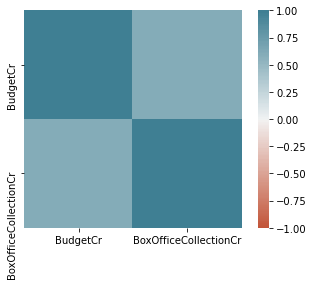

In [51]:
# identify and  Visualize the correlation between the independent variables
#import seaborn as sns
corrdf=df_combined[['BudgetCr','BoxOfficeCollectionCr']]
correlation = corrdf.corr()

print(correlation)
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
   )


****Budget and boxoffice collection  have correlation of 0.605. which means they are very minorly correated to each other
we cannot reduce the features as these are not highly correalted . ****
**** Box Office collection may goes up when Budget increases and 0.6% ratio between budget and BO Collection****

# **Q8. Which are the top 10 movies with maximum return of investment (ROI)? Calculate ROI as (Box office collection – Budget) / Budget.**                                                                     

In [52]:
# get ROI value for each movie and add the column to dataset
df_combined['ROI'] = df_combined.apply(lambda x: (x['BoxOfficeCollectionCr'] - x['BudgetCr'])/x['BudgetCr'], axis = 1)

# find top 10 movies with largest return
df_combined[['Movie_Name', 'ROI']].nlargest(10, 'ROI')

,Movie_Name,ROI
3,Rajdhani Express,53.714286
14,Aashiqui 2,8.166667
39,PK,7.647059
82,Grand Masti,7.514286
85,The Lunchbox,7.500000
37,Fukrey,6.240000
8,Mary Kom,5.933333
78,Shahid,5.666667
37,Humpty Sharma Ki Dulhania,5.500000
51,Bhaag Milkha Bhaag,4.466667
